### Modelling

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import euclidean_distances
from geopy.distance import geodesic
from sklearn.decomposition import PCA
import re

pd.set_option('display.max_columns', 999)  # This allows us to view all the columns
pd.set_option('display.max_rows', 999)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
toronto = pd.read_csv('../Dataset/TORONTO_FINAL.csv')

In [3]:
print(toronto.shape)
toronto.head()

(54643, 88)


,business_id,nb_id,name,latitude,longitude,lat_lon,description,categories,cuisine,food,restaurant,attri,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,user_id,u_id,review_stars,text,date
0,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,69xsJFjiOAd8Ld7WWk_tEw,48,4,I was lucky to attend the soft opening for the...,2017-04-09 22:48:24
1,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,JrXC_MDp38BWwLn2SFdNsA,128,4,"In the heart of Liberty Village, Ono Poke is a...",2017-08-28 14:58:00
2,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,Nq6e5N8bjgD9B46O4va_zA,152,5,"Very delicious, filling and Instagram-worthy p...",2017-09-05 02:13:30
3,T6uVlXYp9XeW8U9QajqQdg,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,TvenTNXyYtMNtED0i2tXfA,203,4,I was very pleasantly surprised coming to this...,2018-05-24 20:23:30
4,T6uVlXYp9Xe

### Separate business + categories and users + attributes

In [4]:
business_cat = toronto[['nb_id', 'name','latitude', 'longitude','description', 'categories', 'cuisine', 'food', 'restaurant']]

In [5]:
users_attr = toronto[['u_id', 'review_stars','nb_id','description','attri',
       'stars', 'attr_RestaurantsDelivery', 'attr_RestaurantsPriceRange2',
       'attr_RestaurantsTakeOut', 'attr_BikeParking', 'attr_Caters',
       'attr_HasTV', 'attr_OutdoorSeating', 'attr_GoodForKids',
       'attr_RestaurantsReservations', 'attr_RestaurantsGoodForGroups',
       'attr_RestaurantsTableService', 'attr_DogsAllowed',
       'attr_WheelchairAccessible', 'attr_DriveThru', 'attr_GoodForDancing',
       'attr_HappyHour', 'attr_CoatCheck', 'attr_ByAppointmentOnly',
       'attr_BusinessAcceptsCreditCards', 'attr_AcceptsInsurance',
       'attr_RestaurantsCounterService', 'attr_BusinessParking_garage',
       'attr_BusinessParking_street', 'attr_BusinessParking_validated',
       'attr_BusinessParking_lot', 'attr_BusinessParking_valet',
       'attr_Ambience_romantic', 'attr_Ambience_intimate',
       'attr_Ambience_classy', 'attr_Ambience_hipster',
       'attr_Ambience_touristy', 'attr_Ambience_trendy',
       'attr_Ambience_upscale', 'attr_Ambience_casual',
       'attr_GoodForMeal_dessert', 'attr_GoodForMeal_latenight',
       'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner',
       'attr_GoodForMeal_brunch', 'attr_GoodForMeal_breakfast',
       'attr_Music_dj', 'attr_Music_background_music', 'attr_Music_jukebox',
       'attr_Music_live', 'attr_Music_video', 'attr_Music_karaoke',
       'attr_BestNights_monday', 'attr_BestNights_tuesday',
       'attr_BestNights_friday', 'attr_BestNights_wednesday',
       'attr_BestNights_thursday', 'attr_BestNights_sunday',
       'attr_BestNights_saturday', 'attr_DietaryRestrictions_gluten-free',
       'attr_DietaryRestrictions_vegan', 'attr_DietaryRestrictions_halal',
       'attr_DietaryRestrictions_vegetarian', 'attr_WiFi_free',
       'attr_WiFi_paid', 'attr_RestaurantsAttire_casual',
       'attr_RestaurantsAttire_dressy', 'attr_RestaurantsAttire_formal',
       'attr_NoiseLevel_average', 'attr_NoiseLevel_loud',
       'attr_NoiseLevel_quiet',
       'attr_Alcohol_beer_and_wine', 'attr_Alcohol_full_bar',
       'attr_Smoking_outdoor', 'attr_Smoking_yes', 'attr_AgesAllowed_19plus']]

In [6]:
business_cat = business_cat.drop_duplicates(subset=['nb_id','description'])
print(business_cat.shape)
business_cat.head()

(5764, 9)


,nb_id,name,latitude,longitude,description,categories,cuisine,food,restaurant
0,0,'ONO Poké Bar,43.639526,-79.415855,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars"
7,1,00 Gelato,43.646312,-79.391329,"stars_4.5, attr_RestaurantsPriceRange2_1, attr...","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants
16,2,0109 Dessert & Chocolate,43.814494,-79.294924,"stars_3.5, attr_RestaurantsPriceRange2_2, attr...","Specialty Food, Desserts, Cafes, Restaurants, ...",Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops"
57,3,1 Plus 2 Pizza & Wings,43.597394,-79.520640,"stars_2.0, attr_RestaurantsDelivery_1, attr_Re...","Pizza, Chicken Wings, Restaurants",nil,"Pizza, Chicken Wings",Restaurants
58,4,100 Percent Korean,43.825482,-79.298528,"stars_4.5, attr_RestaurantsPriceRange2_1, attr...","Korean, Restaurants",Korean,nil,Restaurants


In [7]:
print(users_attr.shape)
users_attr.head()

(54643, 76)


,u_id,review_stars,nb_id,description,attri,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
0,48,4,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,128,4,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,152,5,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,203,4,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,248,4,0,"stars_4.0, attr_RestaurantsDelivery_1, attr_Re...","['stars_4.0', 'attr_RestaurantsDelivery_1', 'a...",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [8]:
business = toronto[['nb_id', 'name','latitude', 'longitude', 'lat_lon',
                    'categories', 'cuisine', 'food', 'restaurant',
       'stars', 'attr_RestaurantsDelivery', 'attr_RestaurantsPriceRange2',
       'attr_RestaurantsTakeOut', 'attr_BikeParking', 'attr_Caters',
       'attr_HasTV', 'attr_OutdoorSeating', 'attr_GoodForKids',
       'attr_RestaurantsReservations', 'attr_RestaurantsGoodForGroups',
       'attr_RestaurantsTableService', 'attr_DogsAllowed',
       'attr_WheelchairAccessible', 'attr_DriveThru', 'attr_GoodForDancing',
       'attr_HappyHour', 'attr_CoatCheck', 'attr_ByAppointmentOnly',
       'attr_BusinessAcceptsCreditCards', 'attr_AcceptsInsurance',
       'attr_RestaurantsCounterService', 'attr_BusinessParking_garage',
       'attr_BusinessParking_street', 'attr_BusinessParking_validated',
       'attr_BusinessParking_lot', 'attr_BusinessParking_valet',
       'attr_Ambience_romantic', 'attr_Ambience_intimate',
       'attr_Ambience_classy', 'attr_Ambience_hipster',
       'attr_Ambience_touristy', 'attr_Ambience_trendy',
       'attr_Ambience_upscale', 'attr_Ambience_casual',
       'attr_GoodForMeal_dessert', 'attr_GoodForMeal_latenight',
       'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner',
       'attr_GoodForMeal_brunch', 'attr_GoodForMeal_breakfast',
       'attr_Music_dj', 'attr_Music_background_music', 'attr_Music_jukebox',
       'attr_Music_live', 'attr_Music_video', 'attr_Music_karaoke',
       'attr_BestNights_monday', 'attr_BestNights_tuesday',
       'attr_BestNights_friday', 'attr_BestNights_wednesday',
       'attr_BestNights_thursday', 'attr_BestNights_sunday',
       'attr_BestNights_saturday', 'attr_DietaryRestrictions_gluten-free',
       'attr_DietaryRestrictions_vegan', 'attr_DietaryRestrictions_halal',
       'attr_DietaryRestrictions_vegetarian', 'attr_WiFi_free',
       'attr_WiFi_paid', 'attr_RestaurantsAttire_casual',
       'attr_RestaurantsAttire_dressy', 'attr_RestaurantsAttire_formal',
       'attr_NoiseLevel_average', 'attr_NoiseLevel_loud',
       'attr_NoiseLevel_quiet',
       'attr_Alcohol_beer_and_wine', 'attr_Alcohol_full_bar',
       'attr_Smoking_outdoor', 'attr_Smoking_yes', 'attr_AgesAllowed_19plus']]

In [9]:
business = business.drop_duplicates(subset=['nb_id'])
print(business.shape)
business.head()

(5764, 80)


,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
0,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,4.5,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,2,0109 Dessert & Chocolate,43.814494,-79.294924,"43.8144936,-79.2949245","Specialty Food, Desserts, Cafes, Restaurants, ...",Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops",3.5,0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
57,3,1 Plus 2 Pizza & Wings,43.597394,-79.520640,"43.597394,-79.5206401","Pizza, Chicken Wings, Restaurants",nil,"Pizza, Chicken Wings",Restaurants,2.0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58,4,100 Percent Korean,43.825482,-79.298528,"43.8254823575,-79.2985280012","Korean, Restaurants",Korean,nil,Restaurants,4.5,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [10]:
business.categories = business.categories.fillna('nil')

In [11]:
print(business.shape)
business.categories.isnull().sum()

(5764, 80)


0

### EDA on `users_attr`

Value_counts on user_ids to show the number of restaurants each user has been to/ reviewed

In [12]:
# groupby can also be used
# users_attr.groupby('u_id')['nb_id'].agg('count').sort_values(ascending = False)
users_attr.u_id.value_counts()[:10]

78     964
172    549
156    491
304    442
319    413
22     399
92     387
8      376
233    347
200    332
Name: u_id, dtype: int64

Value_counts on business_ids to show the number of patronage each restaurant has

In [13]:
users_attr.nb_id.value_counts()[:10]

2322    171
3360    160
4117    145
4021    134
339     130
2254    128
332     120
5665    116
1856    115
5460    115
Name: nb_id, dtype: int64

### Aggregrating the users info and profiling them

In [14]:
def agg_function(df):
    a = []
    nb_id_count = df.groupby('u_id')['nb_id'].agg('count')
    stars_agg = round(df.groupby('u_id')['stars'].agg('mean'),0)
    users_stars = round(df.groupby('u_id')['review_stars'].agg('mean'),0)
    for i in df.columns:
        if ('attr_' in i) and (df[i].nunique() <= 2):
            a.append(i)
            binary_sum = df.groupby('u_id')[a].agg('sum')
        else:
            if ('attr_' in i) and (df[i].nunique() > 2):
                px_range_agg = df.groupby('u_id')[i].agg('mean')
                px_range_agg = round(px_range_agg,0)
                    
    df_agg = pd.concat([nb_id_count, users_stars, stars_agg, px_range_agg, binary_sum], axis=1, sort = False)
    
    return df_agg

In [15]:
users_agg = agg_function(users_attr)
users_agg.head()

,nb_id,review_stars,stars,attr_RestaurantsPriceRange2,attr_RestaurantsDelivery,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
u_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,233,3.0,4.0,2.0,34,187,200,72,79,122,109,113,161,45,1,18,0,3,18,5,1,24,0,0,8,115,3,29,4,6,4,5,13,1,17,4,98,9,11,66,66,15,8,3,19,0,4,1,0,3,0,27,3,18,6,25,0,0,0,0,111,0,157,4,0,128,36,6,23,119,5,0,0
1,79,5.0,4.0,2.0,23,79,72,35,24,21,62,15,43,16,1,13,0,0,1,0,0,6,0,0,1,46,0,8,2,1,2,2,2,1,1,1,39,3,3,33,26,9,5,0,2,0,0,0,0,0,0,3,0,2,1,3,0,0,0,0,33,0,67,0,0,58,4,6,10,15,1,0,0
2,89,4.0,4.0,2.0,19,74,79,30,31,32,47,35,55,26,0,9,0,0,5,1,0,11,0,0,3,51,0,11,2,0,0,1,6,0,6,0,38,3,3,26,32,7,1,1,5,0,4,0,1,1,2,8,2,4,2,9,0,0,0,0,34,0,61,2,0,43,17,4,15,34,0,0,0
3,144,3.0,4.0,2.0,20,105,123,35,58,57,45,74,107,29,0,8,0,0,24,6,0,18,0,0,9,79,3,18,1,0,4,1,4,1,8,2,65,4,7,50,42,9,6,8,19,0,4,0,0,4,3,27,3,15,9,24,0,0,0,0,53,4,95,12,0,75,41,7,12,85,4,0,0
4,142,3.0,4.0,2.0,40,119,125,50,55,45,100,86,119,65,0,14,0,0,12,2,0,13,0,0,9,81,0,24,2,3,3,4,12,1,6,3,74,4,14,56,64,12,7,2,5,1,2,0,0,1,3,12,3,10,3,12,0,0,0,0,52,1,132,2,0,96,26,9,32,69,1,0,0


In [16]:
users_agg = users_agg.reset_index()

In [17]:
users_agg.head()

,u_id,nb_id,review_stars,stars,attr_RestaurantsPriceRange2,attr_RestaurantsDelivery,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
0,0,233,3.0,4.0,2.0,34,187,200,72,79,122,109,113,161,45,1,18,0,3,18,5,1,24,0,0,8,115,3,29,4,6,4,5,13,1,17,4,98,9,11,66,66,15,8,3,19,0,4,1,0,3,0,27,3,18,6,25,0,0,0,0,111,0,157,4,0,128,36,6,23,119,5,0,0
1,1,79,5.0,4.0,2.0,23,79,72,35,24,21,62,15,43,16,1,13,0,0,1,0,0,6,0,0,1,46,0,8,2,1,2,2,2,1,1,1,39,3,3,33,26,9,5,0,2,0,0,0,0,0,0,3,0,2,1,3,0,0,0,0,33,0,67,0,0,58,4,6,10,15,1,0,0
2,2,89,4.0,4.0,2.0,19,74,79,30,31,32,47,35,55,26,0,9,0,0,5,1,0,11,0,0,3,51,0,11,2,0,0,1,6,0,6,0,38,3,3,26,32,7,1,1,5,0,4,0,1,1,2,8,2,4,2,9,0,0,0,0,34,0,61,2,0,43,17,4,15,34,0,0,0
3,3,144,3.0,4.0,2.0,20,105,123,35,58,57,45,74,107,29,0,8,0,0,24,6,0,18,0,0,9,79,3,18,1,0,4,1,4,1,8,2,65,4,7,50,42,9,6,8,19,0,4,0,0,4,3,27,3,15,9,24,0,0,0,0,53,4,95,12,0,75,41,7,12,85,4,0,0
4,4,142,3.0,4.0,2.0,40,119,125,50,55,45,100,86,119,65,0,14,0,0,12,2,0,13,0,0,9,81,0,24,2,3,3,4,12,1,6,3,74,4,14,56,64,12,7,2,5,1,2,0,0,1,3,12,3,10,3,12,0,0,0,0,52,1,132,2,0,96,26,9,32,69,1,0,0


#### Profile users based on clustering

In [18]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
baseline = 1
attr_list = ['stars']
for i in users_agg.columns:
    if 'attr_' in i:
        non_zero_values = users_agg.loc[users_agg[i] != 0].shape[0]
        percent_full = non_zero_values/users_agg.shape[0]
        if percent_full >= baseline:
            attr_list.append(i)
            count_i = len(attr_list)
            #print(i, round(percent_full,2),'\n')

print("We have {} users".format(users_agg.shape[0]))
print('We will be using our {} attributes to cluster our above users'.format(users_agg.shape[1] - 2))
print("Total number of attributes that has more than {}% filled = {}\n".format(int(baseline*100), count_i))
print(attr_list)

We have 421 users
We will be using our 72 attributes to cluster our above users
Total number of attributes that has more than 100% filled = 26

['stars', 'attr_RestaurantsPriceRange2', 'attr_RestaurantsDelivery', 'attr_RestaurantsTakeOut', 'attr_BikeParking', 'attr_Caters', 'attr_HasTV', 'attr_OutdoorSeating', 'attr_GoodForKids', 'attr_RestaurantsReservations', 'attr_RestaurantsGoodForGroups', 'attr_RestaurantsTableService', 'attr_WheelchairAccessible', 'attr_BusinessAcceptsCreditCards', 'attr_BusinessParking_street', 'attr_BusinessParking_lot', 'attr_Ambience_casual', 'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner', 'attr_GoodForMeal_brunch', 'attr_WiFi_free', 'attr_RestaurantsAttire_casual', 'attr_NoiseLevel_average', 'attr_NoiseLevel_loud', 'attr_Alcohol_beer_and_wine', 'attr_Alcohol_full_bar']


In [20]:
def subplot_histplot(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/4))
    a = int(np.ceil(len(list_of_columns)/4))*8.5
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(30,a)) 
    ax = ax.ravel()     
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=30)
        ax[i].set_ylabel('Frequency')
        ax[i].axhline(y=dataframe.shape[0]*0.2, color='r')

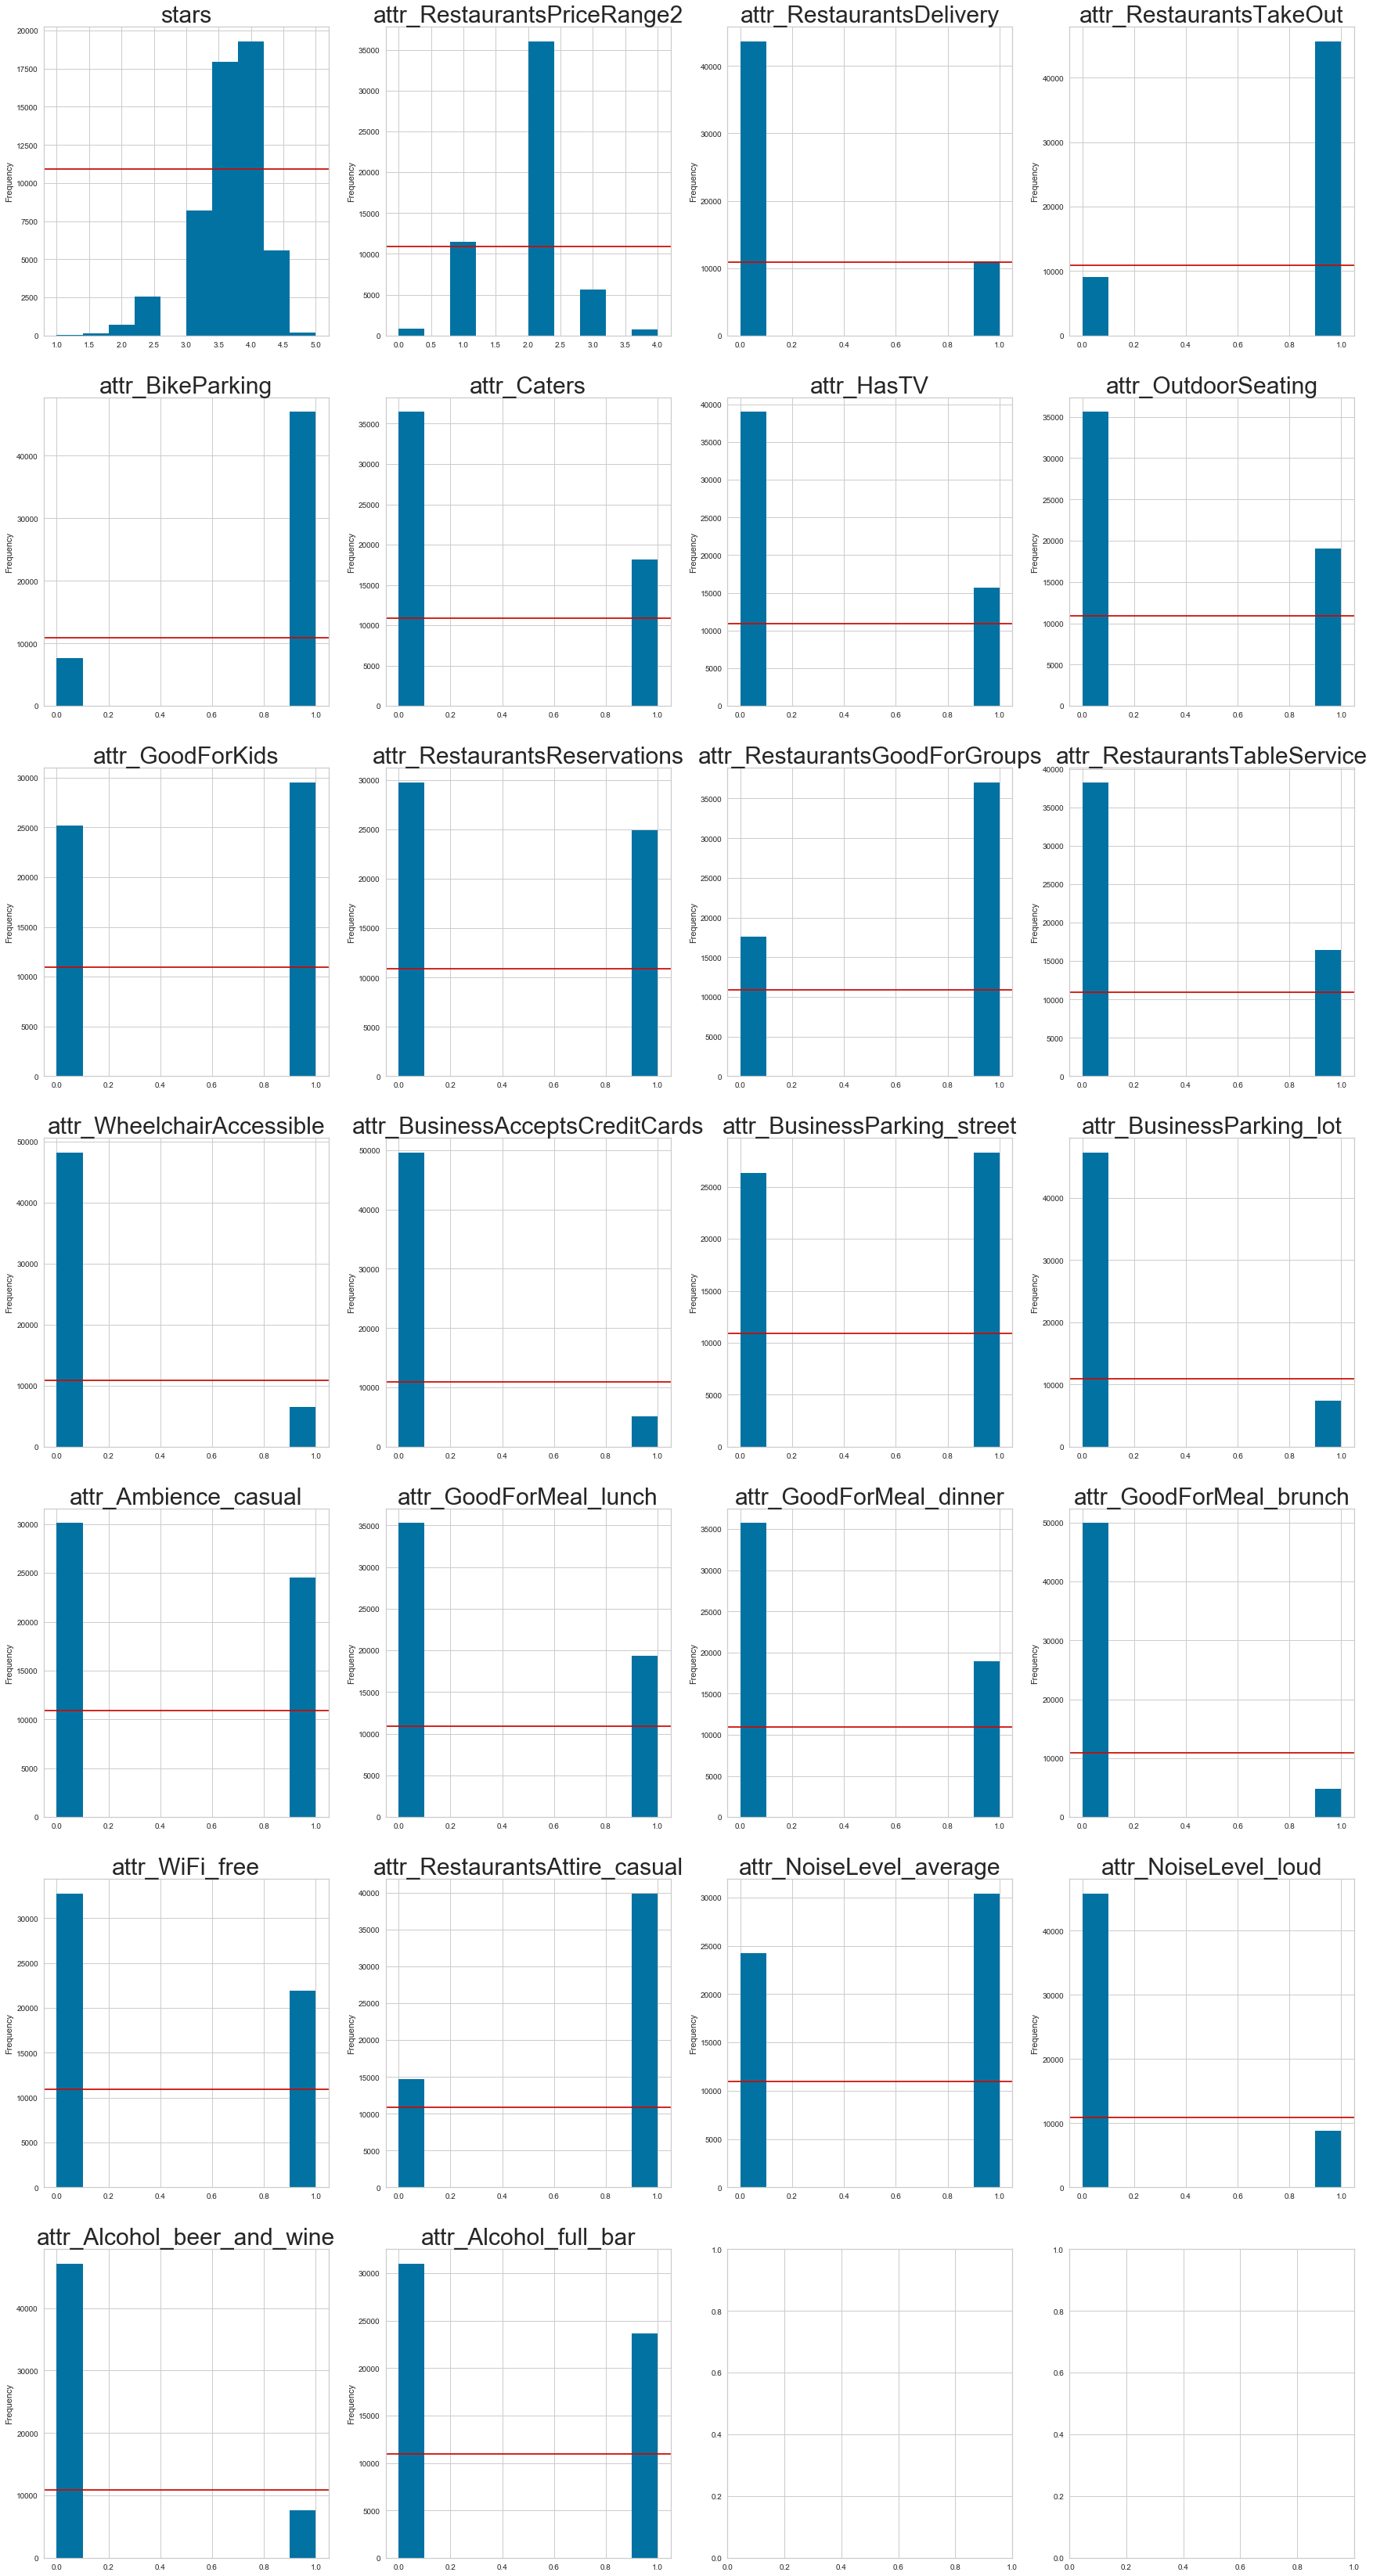

In [21]:
subplot_histplot(users_attr, attr_list, attr_list)

In [22]:
final_attr_list = ['stars', 'attr_RestaurantsPriceRange2','attr_RestaurantsDelivery',
                   'attr_Caters', 'attr_HasTV', 'attr_OutdoorSeating', 'attr_GoodForKids', 
                   'attr_RestaurantsReservations', 'attr_RestaurantsGoodForGroups', 
                   'attr_RestaurantsTableService','attr_BusinessParking_street',
                   'attr_Ambience_casual', 'attr_GoodForMeal_lunch', 'attr_GoodForMeal_dinner',
                   'attr_WiFi_free', 'attr_RestaurantsAttire_casual', 
                   'attr_NoiseLevel_average','attr_Alcohol_full_bar']

In [23]:
X = users_agg.loc[:, final_attr_list]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

KMEANS CLUSTERING

In [24]:
# (thread) How many K here?
# I do: Fit a k-means clustering model
km = KMeans(n_clusters=5, random_state=42)  # 414 / 10 = 40
km.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [25]:
print(len(X_sc[:1][0]))
X_sc[:1][0]

18


array([ 0.46557814, -0.08471737,  0.52988721,  1.15711236,  1.50057522,
        2.42873845,  0.972489  ,  1.5147796 ,  1.41222407,  0.2739576 ,
        1.18614611,  1.21412521,  0.81306946,  0.89130893,  1.77304622,
        1.18992418,  1.38003888,  1.66574626])

In [26]:
# Check out centroids - I have 10 centroids for the 10 clusters I have defined
len(km.cluster_centers_)

5

In [27]:
# Option 1: Class attribute
km.labels_

# Option 2: Predict
km.predict(X_sc)

array([0, 1, 1, 0, 0, 1, 1, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       4, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 4, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 4, 4, 0, 1, 0,
       1, 1, 0, 1, 4, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 4, 1,
       0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 4, 0, 1, 0, 1, 0, 2, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 4, 0, 0, 0, 1, 1, 0, 0, 1, 1, 4, 0, 0, 1, 0, 1, 1, 1, 0, 4,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 4, 1, 1, 1, 4, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 4, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 4, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [28]:
# attach predicted cluster to original points
users_agg['cluster'] = km.labels_
users_agg.head()

,u_id,nb_id,review_stars,stars,attr_RestaurantsPriceRange2,attr_RestaurantsDelivery,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,cluster
0,0,233,3.0,4.0,2.0,34,187,200,72,79,122,109,113,161,45,1,18,0,3,18,5,1,24,0,0,8,115,3,29,4,6,4,5,13,1,17,4,98,9,11,66,66,15,8,3,19,0,4,1,0,3,0,27,3,18,6,25,0,0,0,0,111,0,157,4,0,128,36,6,23,119,5,0,0,0
1,1,79,5.0,4.0,2.0,23,79,72,35,24,21,62,15,43,16,1,13,0,0,1,0,0,6,0,0,1,46,0,8,2,1,2,2,2,1,1,1,39,3,3,33,26,9,5,0,2,0,0,0,0,0,0,3,0,2,1,3,0,0,0,0,33,0,67,0,0,58,4,6,10,15,1,0,0,1
2,2,89,4.0,4.0,2.0,19,74,79,30,31,32,47,35,55,26,0,9,0,0,5,1,0,11,0,0,3,51,0,11,2,0,0,1,6,0,6,0,38,3,3,26,32,7,1,1,5,0,4,0,1,1,2,8,2,4,2,9,0,0,0,0,34,0,61,2,0,43,17,4,15,34,0,0,0,1
3,3,144,3.0,4.0,2.0,20,105,123,35,58,57,45,74,107,29,0,8,0,0,24,6,0,18,0,0,9,79,3,18,1,0,4,1,4,1,8,2,65,4,7,50,42,9,6,8,19,0,4,0,0,4,3,27,3,15,9,24,0,0,0,0,53,4,95,12,0,75,41,7,12,85,4,0,0,0
4,4,142,3.0,4.0,2.0,40,119,125,50,55,45,100,86,119,65,0,14,0,0,12,2,0,13,0,0,9,81,0,24,2,3,3,4,12,1,6,3,74,4,14,56,64,12,7,2,5,1,2,0,0,1,3,12,3,10,3,12,0,0,0,0,52,1,132,2,0,96,26,9,32,69,1,0,0,0


In [29]:
silhouette_score(X_sc, km.labels_)

0.3986812384237006

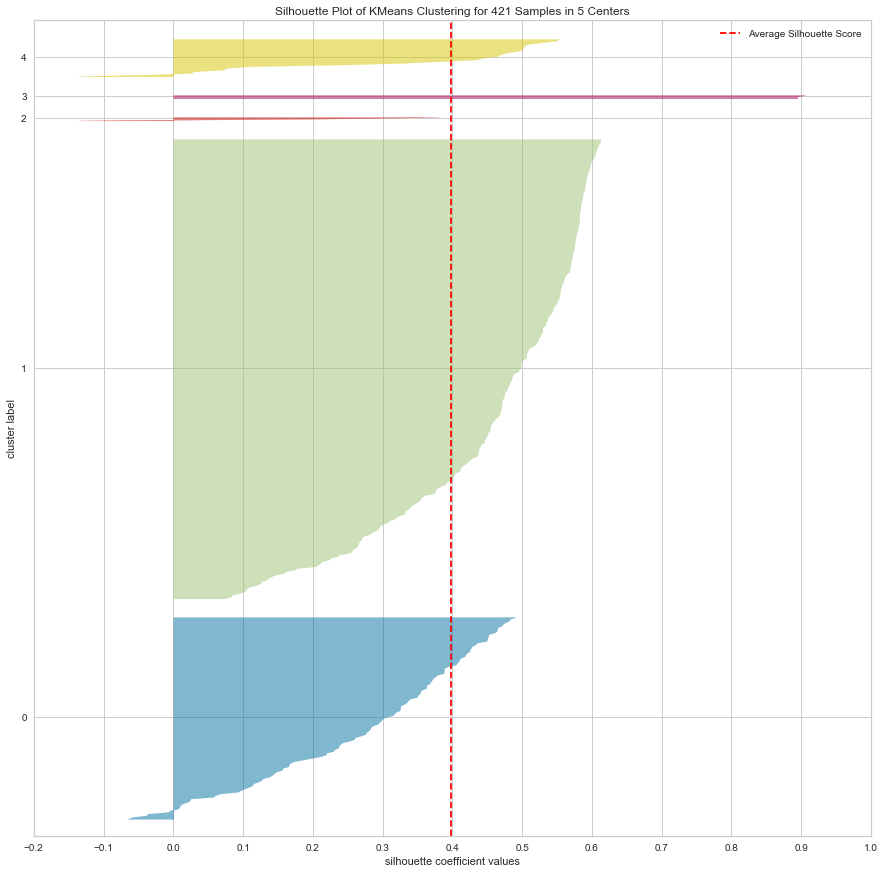

In [30]:
plt.figure(figsize = (15,15))
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(X_sc)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [31]:
scores = []
max_sil = 0
for k in range(2, 20):   # 245 - 23 per cluster, 281 - 20 
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    if sil > max_sil:
        max_sil = sil
        ideal_k = k
        
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']


In [32]:
rough_clusters = round(414/ideal_k,0)
print("Ideal clustering:\nNumber of clusters: {}\nSilhouette score: {}\nRough number of restaurants in clusters: {}".format(ideal_k, max_sil, rough_clusters))
score_df.head()

Ideal clustering:
Number of clusters: 2
Silhouette score: 0.6389058700857531
Rough number of restaurants in clusters: 207.0


,k,inertia,silhouette
0,2,4222.432948,0.638906
1,3,3053.574806,0.407044
2,4,2360.640816,0.355702
3,5,1930.120247,0.374352
4,6,1636.964713,0.319103


Text(0.5, 1.0, 'Silhouette Score over k')

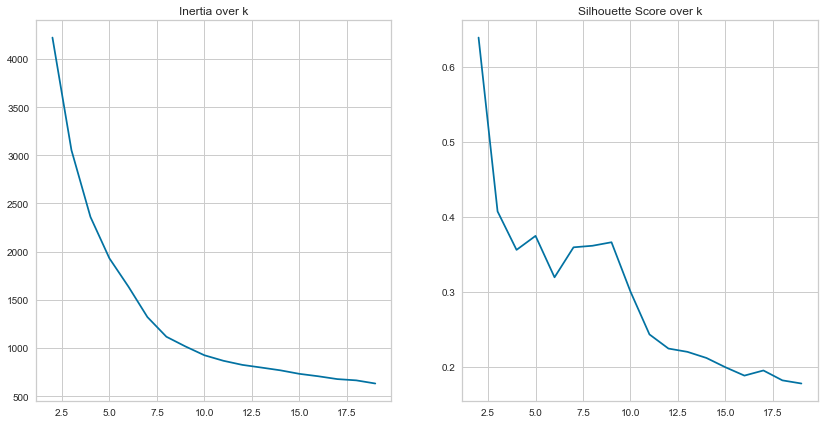

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')

DBSCAN CLUSTERING

In [34]:
import decimal

In [35]:
def plot_results(df, cl):
    X = df.loc[:, attr_list]
    X_sc = scale_matrix(X)
    cl.fit(X_sc)
    df['cluster'] = cl.labels_
    sil = silhouette_score(X_sc, cl.labels_)
    print(f"SILHOUETTE SCORE = {sil}")
    df.plot(kind='scatter', c='cluster', colormap='tab20')

In [36]:
def float_range(start, stop, step):
    while start < stop:
        yield float(start)
        start += decimal.Decimal(step)

eps_list = list(float_range(1, 2.5, '0.05'))
eps_list

samples_list = []
for value in range(2,16):
    samples_list.append(value)

# eps_list, samples_list

In [37]:
fid = users_agg

In [38]:
def find_ideal_dbscan(eps, num_samples):   
    for i in num_samples:
        for j in eps:
            dbscan = DBSCAN(eps = j,min_samples = i )
            dbscan.fit(X_sc)
            sil_sc = silhouette_score(X_sc, dbscan.labels_)
            fid['dbs_cluster'] = dbscan.labels_
            v_counts = fid['dbs_cluster'].value_counts()
            v_outliers = fid['dbs_cluster'].value_counts()[-1]
            
            if sil_sc > 0.307:
                print('eps: {}, num_samples: {}'.format(j,i))                
                print(v_counts)
                print("Number of outlier points: {}".format(v_outliers))
                print('Sil score: {}'.format(sil_sc))
                print('')

In [39]:
find_ideal_dbscan(eps_list, samples_list)

eps: 1.6, num_samples: 8
 0    299
 1     65
-1     57
Name: dbs_cluster, dtype: int64
Number of outlier points: 57
Sil score: 0.30801581888649754

eps: 1.65, num_samples: 8
 0    301
 1     66
-1     54
Name: dbs_cluster, dtype: int64
Number of outlier points: 54
Sil score: 0.30790704507166416

eps: 1.75, num_samples: 13
 0    304
 1     65
-1     52
Name: dbs_cluster, dtype: int64
Number of outlier points: 52
Sil score: 0.3073173426070093

eps: 1.85, num_samples: 15
 0    304
 1     65
-1     52
Name: dbs_cluster, dtype: int64
Number of outlier points: 52
Sil score: 0.3073173426070093



In [40]:
dbscan = DBSCAN(eps = 1.65,min_samples = 8 )
dbscan.fit(X_sc)

DBSCAN(algorithm='auto', eps=1.65, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [41]:
set(dbscan.labels_)

{-1, 0, 1}

In [42]:
# Create cluster column
users_agg['dbs_cluster'] = dbscan.labels_

In [43]:
# Value counts for each cluster
users_agg['dbs_cluster'].value_counts()

 0    301
 1     66
-1     54
Name: dbs_cluster, dtype: int64

In [44]:
silhouette_score(X_sc, dbscan.labels_)

0.30790704507166416

In [45]:
users_agg.head()

,u_id,nb_id,review_stars,stars,attr_RestaurantsPriceRange2,attr_RestaurantsDelivery,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,cluster,dbs_cluster
0,0,233,3.0,4.0,2.0,34,187,200,72,79,122,109,113,161,45,1,18,0,3,18,5,1,24,0,0,8,115,3,29,4,6,4,5,13,1,17,4,98,9,11,66,66,15,8,3,19,0,4,1,0,3,0,27,3,18,6,25,0,0,0,0,111,0,157,4,0,128,36,6,23,119,5,0,0,0,-1
1,1,79,5.0,4.0,2.0,23,79,72,35,24,21,62,15,43,16,1,13,0,0,1,0,0,6,0,0,1,46,0,8,2,1,2,2,2,1,1,1,39,3,3,33,26,9,5,0,2,0,0,0,0,0,0,3,0,2,1,3,0,0,0,0,33,0,67,0,0,58,4,6,10,15,1,0,0,1,0
2,2,89,4.0,4.0,2.0,19,74,79,30,31,32,47,35,55,26,0,9,0,0,5,1,0,11,0,0,3,51,0,11,2,0,0,1,6,0,6,0,38,3,3,26,32,7,1,1,5,0,4,0,1,1,2,8,2,4,2,9,0,0,0,0,34,0,61,2,0,43,17,4,15,34,0,0,0,1,0
3,3,144,3.0,4.0,2.0,20,105,123,35,58,57,45,74,107,29,0,8,0,0,24,6,0,18,0,0,9,79,3,18,1,0,4,1,4,1,8,2,65,4,7,50,42,9,6,8,19,0,4,0,0,4,3,27,3,15,9,24,0,0,0,0,53,4,95,12,0,75,41,7,12,85,4,0,0,0,0
4,4,142,3.0,4.0,2.0,40,119,125,50,55,45,100,86,119,65,0,14,0,0,12,2,0,13,0,0,9,81,0,24,2,3,3,4,12,1,6,3,74,4,14,56,64,12,7,2,5,1,2,0,0,1,3,12,3,10,3,12,0,0,0,0,52,1,132,2,0,96,26,9,32,69,1,0,0,0,0


HIERARCHICAL CLUSTERING

In [46]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [47]:
data_scaled = normalize(X)

In [48]:
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled.head()

,stars,attr_RestaurantsPriceRange2,attr_RestaurantsDelivery,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_BusinessParking_street,attr_Ambience_casual,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_WiFi_free,attr_RestaurantsAttire_casual,attr_NoiseLevel_average,attr_Alcohol_full_bar
0,0.009451,0.004725,0.080332,0.170114,0.186653,0.288249,0.257534,0.266984,0.380394,0.106321,0.271710,0.231544,0.155938,0.155938,0.262259,0.370943,0.302425,0.281161
1,0.026074,0.013037,0.149927,0.228150,0.156446,0.136890,0.404151,0.097779,0.280298,0.104297,0.299854,0.254224,0.215113,0.169483,0.215113,0.436744,0.378077,0.097779
2,0.025805,0.012902,0.122573,0.193536,0.199988,0.206439,0.303207,0.225792,0.354817,0.167731,0.329012,0.245146,0.167731,0.206439,0.219341,0.393524,0.277402,0.219341
3,0.015400,0.007700,0.077001,0.134752,0.223303,0.219453,0.173253,0.284904,0.411956,0.111652,0.304155,0.250254,0.192503,0.161702,0.204053,0.365755,0.288754,0.327255
4,0.012756,0.006378,0.127563,0.159454,0.175400,0.143509,0.318908,0.274261,0.379501,0.207290,0.258316,0.235992,0.178589,0.204101,0.165832,0.420959,0.306152,0.220047


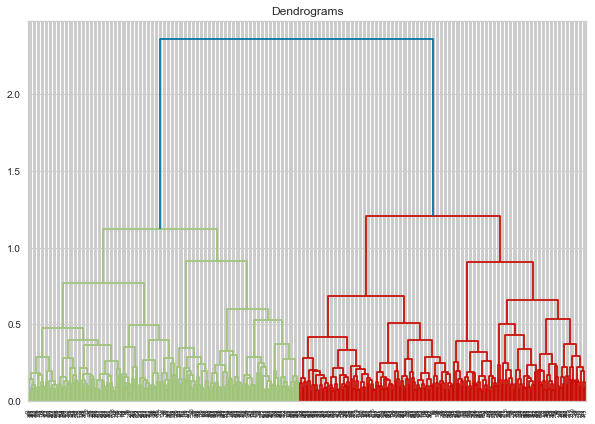

In [49]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a **threshold of 1** and cut the dendrogram:

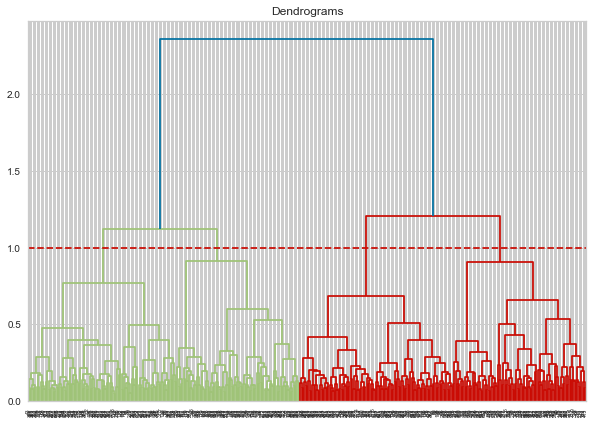

In [50]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at 4 points. Let’s now apply hierarchical clustering for 4 clusters

In [51]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_hc = cluster.fit_predict(data_scaled)
y_hc

array([3, 1, 3, 0, 2, 2, 1, 3, 3, 1, 1, 3, 1, 2, 1, 3, 2, 0, 3, 3, 2, 3,
       3, 1, 1, 1, 1, 0, 2, 3, 3, 1, 0, 0, 0, 0, 2, 3, 1, 0, 1, 0, 2, 3,
       3, 2, 0, 3, 0, 3, 0, 1, 0, 1, 1, 3, 2, 2, 3, 2, 3, 2, 3, 1, 3, 2,
       0, 3, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 3, 3, 0, 2, 2, 1, 2, 3, 2, 3,
       1, 2, 3, 3, 3, 2, 0, 0, 1, 1, 1, 3, 1, 0, 1, 3, 2, 2, 3, 0, 2, 2,
       0, 0, 1, 3, 2, 0, 0, 3, 3, 3, 1, 2, 3, 3, 0, 1, 0, 3, 0, 0, 0, 2,
       2, 3, 2, 2, 0, 3, 3, 0, 0, 1, 2, 1, 3, 2, 3, 3, 0, 3, 3, 1, 2, 2,
       3, 2, 0, 2, 0, 3, 2, 3, 1, 2, 2, 0, 3, 0, 2, 0, 0, 0, 3, 1, 2, 0,
       1, 2, 2, 2, 0, 1, 1, 2, 3, 3, 3, 0, 1, 2, 1, 3, 0, 1, 2, 3, 3, 0,
       2, 1, 3, 0, 3, 3, 1, 0, 1, 2, 2, 3, 3, 1, 3, 3, 1, 1, 2, 2, 0, 3,
       3, 3, 3, 0, 2, 2, 2, 3, 0, 3, 1, 0, 1, 1, 3, 2, 2, 1, 3, 0, 3, 1,
       0, 1, 1, 2, 1, 2, 2, 3, 3, 2, 3, 1, 2, 3, 0, 1, 2, 2, 3, 2, 2, 1,
       1, 1, 1, 3, 2, 2, 1, 0, 0, 3, 0, 0, 1, 1, 3, 2, 1, 3, 1, 3, 0, 2,
       1, 2, 2, 2, 1, 3, 0, 3, 0, 2, 1, 2, 2, 2, 0,

In [52]:
users_agg['hc_cluster'] = cluster.labels_

In [53]:
# Value counts for each cluster
users_agg['hc_cluster'].value_counts()

2    115
3    112
1    101
0     93
Name: hc_cluster, dtype: int64

_____________

### Look at individual users

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

In [55]:
users_agg.head()

,u_id,nb_id,review_stars,stars,attr_RestaurantsPriceRange2,attr_RestaurantsDelivery,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,cluster,dbs_cluster,hc_cluster
0,0,233,3.0,4.0,2.0,34,187,200,72,79,122,109,113,161,45,1,18,0,3,18,5,1,24,0,0,8,115,3,29,4,6,4,5,13,1,17,4,98,9,11,66,66,15,8,3,19,0,4,1,0,3,0,27,3,18,6,25,0,0,0,0,111,0,157,4,0,128,36,6,23,119,5,0,0,0,-1,3
1,1,79,5.0,4.0,2.0,23,79,72,35,24,21,62,15,43,16,1,13,0,0,1,0,0,6,0,0,1,46,0,8,2,1,2,2,2,1,1,1,39,3,3,33,26,9,5,0,2,0,0,0,0,0,0,3,0,2,1,3,0,0,0,0,33,0,67,0,0,58,4,6,10,15,1,0,0,1,0,1
2,2,89,4.0,4.0,2.0,19,74,79,30,31,32,47,35,55,26,0,9,0,0,5,1,0,11,0,0,3,51,0,11,2,0,0,1,6,0,6,0,38,3,3,26,32,7,1,1,5,0,4,0,1,1,2,8,2,4,2,9,0,0,0,0,34,0,61,2,0,43,17,4,15,34,0,0,0,1,0,3
3,3,144,3.0,4.0,2.0,20,105,123,35,58,57,45,74,107,29,0,8,0,0,24,6,0,18,0,0,9,79,3,18,1,0,4,1,4,1,8,2,65,4,7,50,42,9,6,8,19,0,4,0,0,4,3,27,3,15,9,24,0,0,0,0,53,4,95,12,0,75,41,7,12,85,4,0,0,0,0,0
4,4,142,3.0,4.0,2.0,40,119,125,50,55,45,100,86,119,65,0,14,0,0,12,2,0,13,0,0,9,81,0,24,2,3,3,4,12,1,6,3,74,4,14,56,64,12,7,2,5,1,2,0,0,1,3,12,3,10,3,12,0,0,0,0,52,1,132,2,0,96,26,9,32,69,1,0,0,0,0,2


In [56]:
users_hc = users_agg[['u_id','hc_cluster']]
users_hc.head()

,u_id,hc_cluster
0,0,3
1,1,1
2,2,3
3,3,0
4,4,2


In [57]:
toronto = pd.merge(toronto, users_hc, on = 'u_id')

In [58]:
users_business = toronto[['u_id','nb_id','review_stars','hc_cluster']]
users_business.head()

,u_id,nb_id,review_stars,hc_cluster
0,48,0,4,0
1,48,240,3,0
2,48,350,4,0
3,48,378,3,0
4,48,389,4,0


#### 1. User X

In [59]:
user = 13

In [60]:
user_x = users_attr.loc[users_attr.u_id == user]
print(user_x.shape)

(102, 76)


In [61]:
user_x_agg = agg_function(user_x)

num_review = user_x_agg.iloc[0][0]
print('number of reviews:',num_review)
print("\nPercent filled for columns filled more than 25%:")

col_to_cluster = ['stars','attr_RestaurantsPriceRange2']
for i in user_x.columns:
    if len(user_x[i].value_counts()) == 2:
        # print(user_71_agg[i])
        percent_filled = round(user_x_agg[i].iloc[0]/num_review*100,1)
        if percent_filled >= 25:
            col_to_cluster.append(i)
            print("{}: {}%".format(i,percent_filled))
print('')
# print('Number of columns to cluster: {}\n'.format(len(col_to_cluster)))
# print('Columns to cluster:\n{}'.format(col_to_cluster))

# user_xb = user_x.drop_duplicates(subset= 'nb_id')
user_xb = user_x.nb_id.tolist()
user_x_business = business.loc[business.nb_id.isin(user_xb)]

print(user_x_agg.T.head())
print('\nNumber of unique places: {}'.format(user_x_business.shape[0]))
user_x_business.head()

number of reviews: 102.0

Percent filled for columns filled more than 25%:
attr_RestaurantsDelivery: 25.5%
attr_RestaurantsTakeOut: 86.3%
attr_BikeParking: 71.6%
attr_Caters: 42.2%
attr_OutdoorSeating: 26.5%
attr_GoodForKids: 51.0%
attr_RestaurantsReservations: 48.0%
attr_RestaurantsGoodForGroups: 64.7%
attr_RestaurantsTableService: 41.2%
attr_BusinessParking_street: 53.9%
attr_Ambience_casual: 51.0%
attr_GoodForMeal_lunch: 43.1%
attr_GoodForMeal_dinner: 42.2%
attr_WiFi_free: 35.3%
attr_RestaurantsAttire_casual: 71.6%
attr_NoiseLevel_average: 48.0%
attr_Alcohol_full_bar: 41.2%

u_id                            13
nb_id                        102.0
review_stars                   4.0
stars                          4.0
attr_RestaurantsPriceRange2    2.0
attr_RestaurantsDelivery      26.0

Number of unique places: 93


,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
487,63,AKA-ONI Izakaya,43.821986,-79.298920,"43.8219855641,-79.2989197664","Barbeque, Asian Fusion, Japanese, Tapas/Small ...","Barbeque, Asian Fusion, Japanese",Tapas/Small Plates,"Sushi Bars, Restaurants",4.0,0,2,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1617,199,Aroma Espresso Bar,43.707276,-79.399601,"43.7072763,-79.39960090000001","Breakfast & Brunch, Sandwiches, Coffee & Tea, ...",nil,"Breakfast & Brunch, Sandwiches, Coffee & Tea",Restaurants,3.5,1,2,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2013,240,Assembly Chef's Hall,43.650352,-79.383795,"43.65035220000001,-79.38379509999999","Japanese, Barbeque, Vegan, Ramen, Pizza, Break...","Japanese, Barbeque, Vegan","Ramen, Pizza, Breakfast & Brunch, Coffee & Tea","Food Court, Restaurants, Cafes, Sushi Bars, Di...",4.0,1,2,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
2604,306,Bake Code - North York,43.764052,-79.411873,"43.7640519918,-79.41187296060001","Restaurants, Bakeries",nil,nil,"Restaurants, Bakeries",3.5,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3547,354,Bar Begonia,43.675201,-79.406366,"43.675200700000005,-79.4063661","French, Restaurants",French,nil,Restaurants,3.5,0,3,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


Step 1: Find the attribute cluster user x is in
- Use `users_hc` df

In [62]:
cluster = users_hc.loc[users_hc.u_id == user, 'hc_cluster'].item()
cluster

2

Step 2: Use collaborative filtering to find the restaurants suited to user 100 based on attributes

In [63]:
users_business_x = users_business.loc[users_business.hc_cluster == cluster]
users_business_x = users_business_x.drop_duplicates(subset = 'nb_id')
print('Number of places based on collaborative filtering: {}'.format(users_business_x.shape[0]))
business_x = business[business.nb_id.isin(users_business_x.nb_id.tolist())]
business_x.head()

Number of places based on collaborative filtering: 3231


,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
0,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,4.5,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,2,0109 Dessert & Chocolate,43.814494,-79.294924,"43.8144936,-79.2949245","Specialty Food, Desserts, Cafes, Restaurants, ...",Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops",3.5,0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
58,4,100 Percent Korean,43.825482,-79.298528,"43.8254823575,-79.2985280012","Korean, Restaurants",Korean,nil,Restaurants,4.5,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
74,5,120 Diner,43.652151,-79.375478,"43.6521506,-79.3754775","Comfort Food, Restaurants, Diners",Comfort Food,nil,"Restaurants, Diners",4.0,1,2,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0


Step 3: Use content based filtering to find similar restaurants for user 100

In [64]:
# Look at all the restaurants user_100 goes to
user_x_business.head(3)

,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
487,63,AKA-ONI Izakaya,43.821986,-79.298920,"43.8219855641,-79.2989197664","Barbeque, Asian Fusion, Japanese, Tapas/Small ...","Barbeque, Asian Fusion, Japanese",Tapas/Small Plates,"Sushi Bars, Restaurants",4.0,0,2,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1617,199,Aroma Espresso Bar,43.707276,-79.399601,"43.7072763,-79.39960090000001","Breakfast & Brunch, Sandwiches, Coffee & Tea, ...",nil,"Breakfast & Brunch, Sandwiches, Coffee & Tea",Restaurants,3.5,1,2,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2013,240,Assembly Chef's Hall,43.650352,-79.383795,"43.65035220000001,-79.38379509999999","Japanese, Barbeque, Vegan, Ramen, Pizza, Break...","Japanese, Barbeque, Vegan","Ramen, Pizza, Breakfast & Brunch, Coffee & Tea","Food Court, Restaurants, Cafes, Sushi Bars, Di...",4.0,1,2,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [65]:
# Look at all the restaurants people like user_100 go to
business_x.head(3)

,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
0,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,4.5,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,2,0109 Dessert & Chocolate,43.814494,-79.294924,"43.8144936,-79.2949245","Specialty Food, Desserts, Cafes, Restaurants, ...",Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops",3.5,0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0


In [66]:
user_x_blist = user_x_business.nb_id.tolist()
user_x_blist[:10]

[63, 199, 240, 306, 354, 355, 360, 643, 680, 690]

In [67]:
# get matrix for categories in clusterd businesses
cv = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
cv_matrix = cv.fit_transform(business_x['categories'])

In [68]:
cv_matrix.shape

(3231, 1665)

In [69]:
cosine_sim = linear_kernel(cv_matrix, cv_matrix)

In [70]:
# get matrix for categories in clusterd businesses
# tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
# tfidf_matrix = tf.fit_transform(business_x['categories'])

In [71]:
# tfidf_matrix.shape

In [72]:
# cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [73]:
business_x = business_x.reset_index()
business_id = business_x[['name','categories','cuisine','food','restaurant']]
indices = pd.Series(business_x.index, index=business_x['nb_id'])

In [74]:
def get_recommendations(businesses):
    for x in businesses:
        idx = indices[x]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:101]
        desc_indices = [i[0] for i in sim_scores]
        return business_id.iloc[desc_indices]

In [75]:
# So these are the recommended restaurants for user 100
user_x_rec = get_recommendations(user_x_blist)
user_x_rec.head()

,name,categories,cuisine,food,restaurant
30,AKA-ONI Izakaya,"Barbeque, Asian Fusion, Japanese, Tapas/Small ...","Barbeque, Asian Fusion, Japanese",Tapas/Small Plates,"Sushi Bars, Restaurants"
1336,KINKA IZAKAYA ORIGINAL,"Japanese, Tapas/Small Plates, Bars, Restaurant...",Japanese,Tapas/Small Plates,"Bars, Restaurants, Tapas Bars, Pubs"
1361,Kanpai Snack Bar,"Asian Fusion, Taiwanese, Tapas/Small Plates, T...","Asian Fusion, Taiwanese",Tapas/Small Plates,"Tapas Bars, Restaurants"
1420,Kintaro Izakaya,"Japanese, Tapas/Small Plates, Restaurants, Sus...",Japanese,Tapas/Small Plates,"Restaurants, Sushi Bars, Bars"
2502,Spark Espresso and Fresh Bar,"Vegetarian, Coffee & Tea, Salad, Tapas/Small P...",Vegetarian,"Coffee & Tea, Salad, Tapas/Small Plates, Juice...","Tapas Bars, Cocktail Bars, Bars, Restaurants, ..."


In [76]:
# Lets look at user 100 profile and see what kinds of places does he go to most often
user_x_business.head()

,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
487,63,AKA-ONI Izakaya,43.821986,-79.298920,"43.8219855641,-79.2989197664","Barbeque, Asian Fusion, Japanese, Tapas/Small ...","Barbeque, Asian Fusion, Japanese",Tapas/Small Plates,"Sushi Bars, Restaurants",4.0,0,2,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1617,199,Aroma Espresso Bar,43.707276,-79.399601,"43.7072763,-79.39960090000001","Breakfast & Brunch, Sandwiches, Coffee & Tea, ...",nil,"Breakfast & Brunch, Sandwiches, Coffee & Tea",Restaurants,3.5,1,2,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2013,240,Assembly Chef's Hall,43.650352,-79.383795,"43.65035220000001,-79.38379509999999","Japanese, Barbeque, Vegan, Ramen, Pizza, Break...","Japanese, Barbeque, Vegan","Ramen, Pizza, Breakfast & Brunch, Coffee & Tea","Food Court, Restaurants, Cafes, Sushi Bars, Di...",4.0,1,2,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
2604,306,Bake Code - North York,43.764052,-79.411873,"43.7640519918,-79.41187296060001","Restaurants, Bakeries",nil,nil,"Restaurants, Bakeries",3.5,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3547,354,Bar Begonia,43.675201,-79.406366,"43.675200700000005,-79.4063661","French, Restaurants",French,nil,Restaurants,3.5,0,3,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [77]:
def buisness_cat_plot(df, colname):
    business_colname = ', '.join(df[colname])
    colname_x = pd.DataFrame(business_colname.split(', '),columns=['colname'])
    
    x = colname_x.colname.value_counts()
    x = x.sort_values(ascending=False)
    x = x.iloc[0:10] 
    
    plt.figure(figsize=(16,4))
    ax = sns.barplot(x.index, x.values, alpha=0.8)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.title("Distribution of restaurants by {}s".format(colname))
    plt.show()
    return x

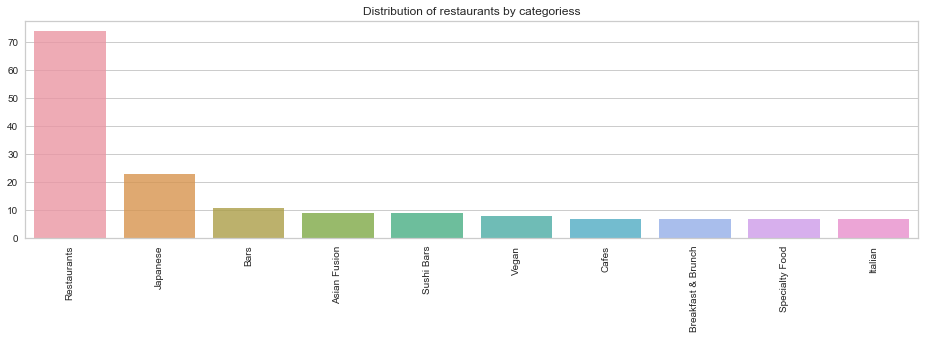

Restaurants           74
Japanese              23
Bars                  11
Asian Fusion           9
Sushi Bars             9
Vegan                  8
Cafes                  7
Breakfast & Brunch     7
Specialty Food         7
Italian                7
Name: colname, dtype: int64

In [78]:
buisness_cat_plot(user_x_business[user_x_business.cuisine != 'nil'],'categories')

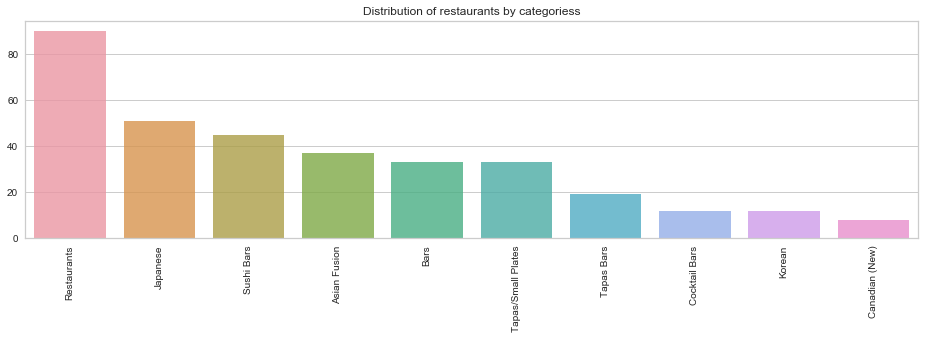

Restaurants           90
Japanese              51
Sushi Bars            45
Asian Fusion          37
Bars                  33
Tapas/Small Plates    33
Tapas Bars            19
Cocktail Bars         12
Korean                12
Canadian (New)         8
Name: colname, dtype: int64

In [79]:
buisness_cat_plot(user_x_rec[user_x_rec.cuisine != 'nil'],'categories')

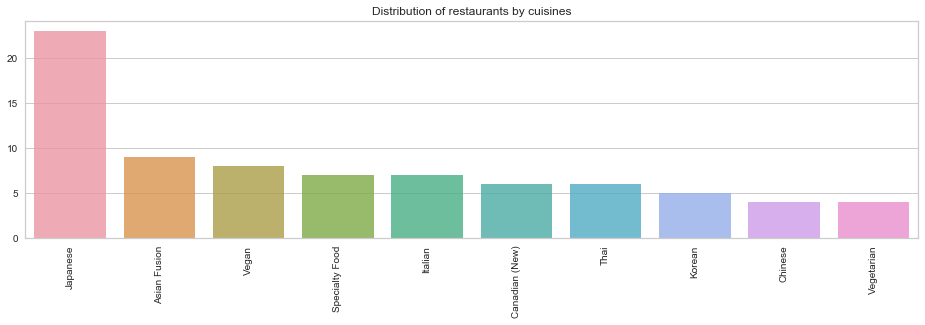

Japanese          23
Asian Fusion       9
Vegan              8
Specialty Food     7
Italian            7
Canadian (New)     6
Thai               6
Korean             5
Chinese            4
Vegetarian         4
Name: colname, dtype: int64

In [80]:
buisness_cat_plot(user_x_business[user_x_business.cuisine != 'nil'],'cuisine')

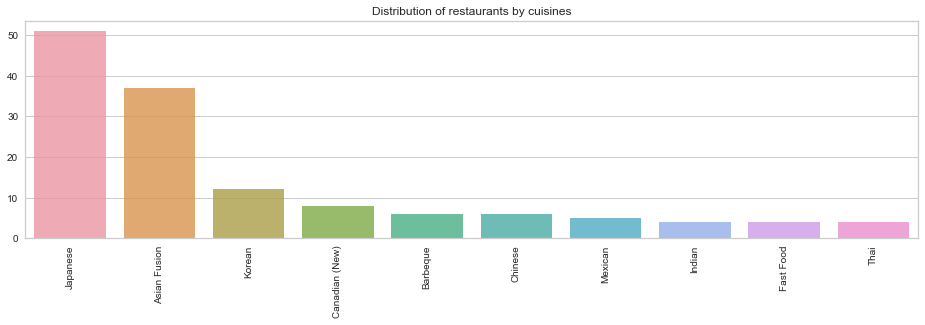

Japanese          51
Asian Fusion      37
Korean            12
Canadian (New)     8
Barbeque           6
Chinese            6
Mexican            5
Indian             4
Fast Food          4
Thai               4
Name: colname, dtype: int64

In [81]:
buisness_cat_plot(user_x_rec[user_x_rec.cuisine != 'nil'],'cuisine')

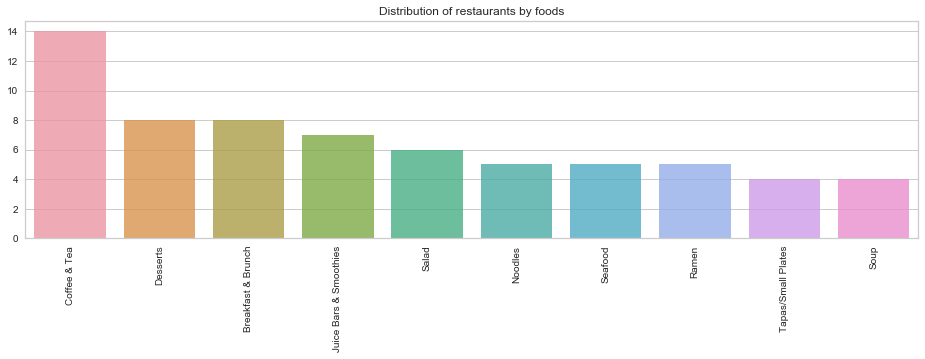

Coffee & Tea              14
Desserts                   8
Breakfast & Brunch         8
Juice Bars & Smoothies     7
Salad                      6
Noodles                    5
Seafood                    5
Ramen                      5
Tapas/Small Plates         4
Soup                       4
Name: colname, dtype: int64

In [82]:
buisness_cat_plot(user_x_business[user_x_business.food != 'nil'],'food')

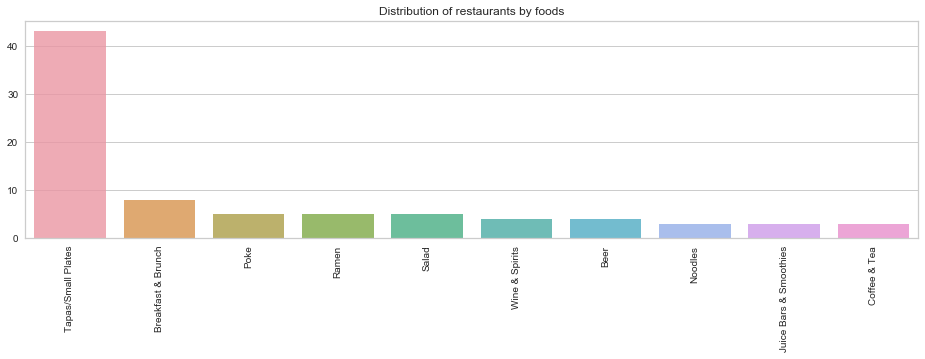

Tapas/Small Plates        43
Breakfast & Brunch         8
Poke                       5
Ramen                      5
Salad                      5
Wine & Spirits             4
Beer                       4
Noodles                    3
Juice Bars & Smoothies     3
Coffee & Tea               3
Name: colname, dtype: int64

In [83]:
buisness_cat_plot(user_x_rec[user_x_rec.food != 'nil'],'food')

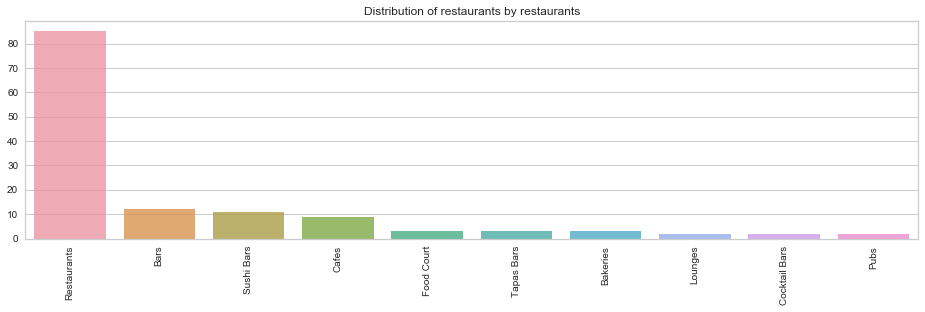

Restaurants      85
Bars             12
Sushi Bars       11
Cafes             9
Food Court        3
Tapas Bars        3
Bakeries          3
Lounges           2
Cocktail Bars     2
Pubs              2
Name: colname, dtype: int64

In [84]:
buisness_cat_plot(user_x_business[user_x_business.restaurant != 'nil'],'restaurant')

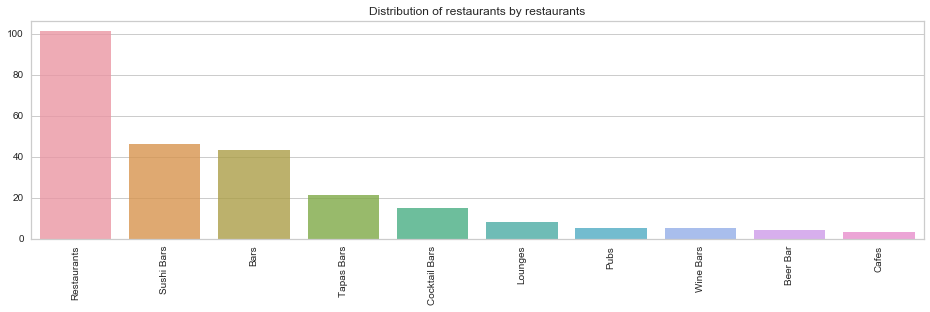

Restaurants      101
Sushi Bars        46
Bars              43
Tapas Bars        21
Cocktail Bars     15
Lounges            8
Pubs               5
Wine Bars          5
Beer Bar           4
Cafes              3
Name: colname, dtype: int64

In [85]:
buisness_cat_plot(user_x_rec[user_x_rec.restaurant != 'nil'],'restaurant')

####  Filtering based on location

In [128]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [116]:
business.head(2)

,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,cuisine_food,cuisine_res,food_res
0,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,"Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian, Restaurants, Sushi Bars","Asian Fusion, Hawaiian, Poke"
7,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,4.5,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Belgian, Waffles, Ice Cream & Frozen Yogurt, D...","Belgian, Restaurants","Belgian, Waffles, Ice Cream & Frozen Yogurt, D..."


In [119]:
geolocator = Nominatim(user_agent="unicorn")
location = geolocator.reverse(business.lat_lon.iloc[2])
location.raw

{'place_id': 131412618,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 195235092,
 'lat': '43.814501',
 'lon': '-79.29494792727272',
 'display_name': "Maxum I, 2190, McNicoll Avenue, L'Amoreaux, Scarborough—Agincourt, Scarborough, Toronto, Golden Horseshoe, Ontario, M1V 5P4, Canada",
 'address': {'address29': 'Maxum I',
  'house_number': '2190',
  'road': 'McNicoll Avenue',
  'neighbourhood': "L'Amoreaux",
  'city_district': 'Scarborough—Agincourt',
  'city': 'Toronto',
  'state_district': 'Golden Horseshoe',
  'state': 'Ontario',
  'postcode': 'M1V 5P4',
  'country': 'Canada',
  'country_code': 'ca'},
 'boundingbox': ['43.814137', '43.814862', '-79.295179', '-79.294192']}

In [120]:
location.raw.keys()

dict_keys(['place_id', 'licence', 'osm_type', 'osm_id', 'lat', 'lon', 'display_name', 'address', 'boundingbox'])

In [121]:
location.raw['address']

{'address29': 'Maxum I',
 'house_number': '2190',
 'road': 'McNicoll Avenue',
 'neighbourhood': "L'Amoreaux",
 'city_district': 'Scarborough—Agincourt',
 'city': 'Toronto',
 'state_district': 'Golden Horseshoe',
 'state': 'Ontario',
 'postcode': 'M1V 5P4',
 'country': 'Canada',
 'country_code': 'ca'}

In [122]:
geolocator.reverse(business.lat_lon.iloc[2]).raw['address']['city_district']

'Scarborough—Agincourt'

In [ ]:
geolocator = Nominatim(user_agent="unicorn")
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [358]:
toronto_address = pd.read_csv('../Dataset/ca/on/city_of_toronto.csv')

In [359]:
print(toronto_address.shape)
toronto_address.head()

(525545, 11)


,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
0,-79.544251,43.593789,22,Lloyd George Ave,NaN,Etobicoke,NaN,NaN,NaN,NaN,4609176c08c67d96
1,-79.543495,43.593445,3,Lloyd George Ave,NaN,Etobicoke,NaN,NaN,NaN,NaN,8acf99afdb870ad6
2,-79.543577,43.593622,7A,Lloyd George Ave,NaN,Etobicoke,NaN,NaN,NaN,NaN,239c832319e298e7
3,-79.546567,43.596203,58,Foch Ave,NaN,Etobicoke,NaN,NaN,NaN,NaN,2bb9aab1d601c207
4,-79.546411,43.595993,54,Foch Ave,NaN,Etobicoke,NaN,NaN,NaN,NaN,c33e434ceba1c9fb


In [360]:
toronto_address['LON'] = round(toronto_address['LON'],2)
toronto_address['LAT'] = round(toronto_address['LAT'],2)

In [361]:
toronto_address['latlon'] = toronto_address[['LAT', 'LON']].values.tolist()
toronto_address['lat_lon'] =  [','.join(map(str, l)) for l in toronto_address['latlon']]
toronto_address = toronto_address.drop(columns='latlon')

In [362]:
toronto_address = toronto_address[['lat_lon','STREET','CITY']]
toronto_address.head()

,lat_lon,STREET,CITY
0,"43.59,-79.54",Lloyd George Ave,Etobicoke
1,"43.59,-79.54",Lloyd George Ave,Etobicoke
2,"43.59,-79.54",Lloyd George Ave,Etobicoke
3,"43.6,-79.55",Foch Ave,Etobicoke
4,"43.6,-79.55",Foch Ave,Etobicoke


In [363]:
business1 = business

In [364]:
business1['longitude'] = round(business1['longitude'],2)
business1['latitude'] = round(business1['latitude'],2)

In [365]:
business1 = business1.drop(columns='lat_lon')
business1['latlon'] = business1[['latitude', 'longitude']].values.tolist()
business1['lat_lon'] =  [','.join(map(str, l)) for l in business1['latlon']]
business1 = business1.drop(columns='latlon')

In [366]:
business1 = pd.merge(business1, toronto_address, on = 'lat_lon', how = 'left')

MemoryError: Unable to allocate 4.08 GiB for an array with shape (71, 7719966) and data type int64

In [ ]:
business1.head()

In [ ]:
business1.STREET.isnull().sum()

In [129]:
# business['address'] = business.apply(
#     lambda row: geolocator.reverse((row['lat_lon']), timeout = 2), axis=1)

In [130]:
#business['city_district']  = business['address'].map(lambda x: x.raw['address']['city_district'])

## Using  user input

In [92]:
business.head(2)

,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus
0,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,4.5,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
business['cuisine_food'] = business[business.columns[5:7]].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1
)

business['cuisine_res'] = business[['cuisine','restaurant']].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1
)

business['food_res'] = business[business.columns[6:8]].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1
)

In [94]:
business.head(3)

,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,cuisine_food,cuisine_res,food_res
0,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,"Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian, Restaurants, Sushi Bars","Asian Fusion, Hawaiian, Poke"
7,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,4.5,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Belgian, Waffles, Ice Cream & Frozen Yogurt, D...","Belgian, Restaurants","Belgian, Waffles, Ice Cream & Frozen Yogurt, D..."
16,2,0109 Dessert & Chocolate,43.814494,-79.294924,"43.8144936,-79.2949245","Specialty Food, Desserts, Cafes, Restaurants, ...",Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops",3.5,0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,"Specialty Food, Desserts, Cafes, Restaurants, ...","Specialty Food, Cafes, Restaurants, Chocolatie...","Specialty Food, Desserts"


In [254]:
user = 87
input_list = []
input_cuisine = 'Pakistani'
input_food = ''
input_res = ''

#### Step 1: Find the businesses `input_user` has gone to 

In [255]:
user_x = users_attr.loc[users_attr.u_id == user]
print(user_x.shape)

(139, 76)


In [256]:
user_x_agg = agg_function(user_x)

num_review = user_x_agg.iloc[0][0]
print('number of reviews:',num_review)
print("\nPercent filled for columns filled more than 25%:")

col_to_cluster = ['stars','attr_RestaurantsPriceRange2']
for i in user_x.columns:
    if len(user_x[i].value_counts()) == 2:
        # print(user_71_agg[i])
        percent_filled = round(user_x_agg[i].iloc[0]/num_review*100,1)
        if percent_filled >= 25:
            col_to_cluster.append(i)
            print("{}: {}%".format(i,percent_filled))
print('')
# print('Number of columns to cluster: {}\n'.format(len(col_to_cluster)))
# print('Columns to cluster:\n{}'.format(col_to_cluster))

# user_xb = user_x.drop_duplicates(subset= 'nb_id')
user_xb = user_x.nb_id.tolist()
user_x_business = business.loc[business.nb_id.isin(user_xb)]

print(user_x_agg.T.head())
print('\nNumber of unique places: {}'.format(user_x_business.shape[0]))
user_x_business.head()

number of reviews: 139.0

Percent filled for columns filled more than 25%:
attr_RestaurantsTakeOut: 84.2%
attr_BikeParking: 88.5%
attr_Caters: 31.7%
attr_HasTV: 29.5%
attr_OutdoorSeating: 41.7%
attr_GoodForKids: 56.8%
attr_RestaurantsReservations: 61.9%
attr_RestaurantsGoodForGroups: 77.7%
attr_RestaurantsTableService: 39.6%
attr_BusinessParking_street: 57.6%
attr_Ambience_casual: 45.3%
attr_GoodForMeal_lunch: 38.1%
attr_GoodForMeal_dinner: 35.3%
attr_WiFi_free: 39.6%
attr_RestaurantsAttire_casual: 82.0%
attr_NoiseLevel_average: 49.6%
attr_NoiseLevel_loud: 25.2%
attr_Alcohol_full_bar: 49.6%

u_id                            87
nb_id                        139.0
review_stars                   4.0
stars                          4.0
attr_RestaurantsPriceRange2    2.0
attr_RestaurantsDelivery      32.0

Number of unique places: 134


,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,cuisine_food,cuisine_res,food_res
183,20,416 Snack Bar,43.647536,-79.403853,"43.6475364,-79.40385340000002","Tapas/Small Plates, Restaurants, Bars",nil,Tapas/Small Plates,"Restaurants, Bars",4.0,0,2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,"Tapas/Small Plates, Restaurants, Bars, nil","nil, Restaurants, Bars","nil, Tapas/Small Plates"
743,90,Aji Sai Plus Resto Lounge,43.667829,-79.385776,"43.667828899999996,-79.38577640000001","Japanese, Lounges, Tapas Bars, Bars, Sushi Bar...",Japanese,nil,"Lounges, Tapas Bars, Bars, Sushi Bars, Restaur...",2.0,0,2,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,"Japanese, Lounges, Tapas Bars, Bars, Sushi Bar...","Japanese, Lounges, Tapas Bars, Bars, Sushi Bar...","Japanese, nil"
1878,234,Asahi Sushi,43.669947,-79.382900,"43.6699469,-79.38290009999999","Korean, Japanese, Restaurants, Sushi Bars","Korean, Japanese",nil,"Restaurants, Sushi Bars",3.0,1,2,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,"Korean, Japanese, Restaurants, Sushi Bars, Kor...","Korean, Japanese, Restaurants, Sushi Bars","Korean, Japanese, nil"
1905,236,Asian Bowl,43.655400,-79.380288,"43.6554,-79.38028829999999","Vietnamese, Thai, Chinese, Restaurants","Vietnamese, Thai, Chinese",nil,Restaurants,3.5,1,2,1,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,"Vietnamese, Thai, Chinese, Restaurants, Vietna...","Vietnamese, Thai, Chinese, Restaurants","Vietnamese, Thai, Chinese, nil"
1929,237,Asian Legend,43.788375,-79.267270,"43.788374600000004,-79.2672698","Chinese, Restaurants",Chinese,nil,Restaurants,3.5,0,2,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,"Chinese, Restaurants, Chinese","Chinese, Restaurants","Chinese, nil"


#### Step 2: Find the attribute cluster user x is in
- Use `users_hc` df

In [257]:
cluster = users_hc.loc[users_hc.u_id == user, 'hc_cluster'].item()
cluster

3

#### Step 3: Use predefined clusters (collaborative filtering) to find the restaurants suited to `input_user` based on attributes

In [258]:
users_business_x = users_business.loc[users_business.hc_cluster == cluster]
users_business_x = users_business_x.drop_duplicates(subset = 'nb_id')
print('Number of places based on collaborative filtering: {}'.format(users_business_x.shape[0]))
business_x = business[business.nb_id.isin(users_business_x.nb_id.tolist())]
# Look at all the restaurants people like user go to
business_x.head() 

Number of places based on collaborative filtering: 4271


,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,cuisine_food,cuisine_res,food_res
0,0,'ONO Poké Bar,43.639526,-79.415855,"43.639525799999994,-79.4158554","Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian",Poke,"Restaurants, Sushi Bars",4.0,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,"Asian Fusion, Hawaiian, Poke, Restaurants, Sus...","Asian Fusion, Hawaiian, Restaurants, Sushi Bars","Asian Fusion, Hawaiian, Poke"
7,1,00 Gelato,43.646312,-79.391329,"43.646311931499994,-79.39132929600001","Belgian, Waffles, Ice Cream & Frozen Yogurt, D...",Belgian,"Waffles, Ice Cream & Frozen Yogurt, Desserts",Restaurants,4.5,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Belgian, Waffles, Ice Cream & Frozen Yogurt, D...","Belgian, Restaurants","Belgian, Waffles, Ice Cream & Frozen Yogurt, D..."
16,2,0109 Dessert & Chocolate,43.814494,-79.294924,"43.8144936,-79.2949245","Specialty Food, Desserts, Cafes, Restaurants, ...",Specialty Food,Desserts,"Cafes, Restaurants, Chocolatiers & Shops",3.5,0,2,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,"Specialty Food, Desserts, Cafes, Restaurants, ...","Specialty Food, Cafes, Restaurants, Chocolatie...","Specialty Food, Desserts"
57,3,1 Plus 2 Pizza & Wings,43.597394,-79.520640,"43.597394,-79.5206401","Pizza, Chicken Wings, Restaurants",nil,"Pizza, Chicken Wings",Restaurants,2.0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"Pizza, Chicken Wings, Restaurants, nil","nil, Restaurants","nil, Pizza, Chicken Wings"
58,4,100 Percent Korean,43.825482,-79.298528,"43.8254823575,-79.2985280012","Korean, Restaurants",Korean,nil,Restaurants,4.5,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,"Korean, Restaurants, Korean","Korean, Restaurants","Korean, nil"


In [259]:
# Look at all the restaurants user goes to
user_x_business.head(3)

,nb_id,name,latitude,longitude,lat_lon,categories,cuisine,food,restaurant,stars,attr_RestaurantsDelivery,attr_RestaurantsPriceRange2,attr_RestaurantsTakeOut,attr_BikeParking,attr_Caters,attr_HasTV,attr_OutdoorSeating,attr_GoodForKids,attr_RestaurantsReservations,attr_RestaurantsGoodForGroups,attr_RestaurantsTableService,attr_DogsAllowed,attr_WheelchairAccessible,attr_DriveThru,attr_GoodForDancing,attr_HappyHour,attr_CoatCheck,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,attr_AcceptsInsurance,attr_RestaurantsCounterService,attr_BusinessParking_garage,attr_BusinessParking_street,attr_BusinessParking_validated,attr_BusinessParking_lot,attr_BusinessParking_valet,attr_Ambience_romantic,attr_Ambience_intimate,attr_Ambience_classy,attr_Ambience_hipster,attr_Ambience_touristy,attr_Ambience_trendy,attr_Ambience_upscale,attr_Ambience_casual,attr_GoodForMeal_dessert,attr_GoodForMeal_latenight,attr_GoodForMeal_lunch,attr_GoodForMeal_dinner,attr_GoodForMeal_brunch,attr_GoodForMeal_breakfast,attr_Music_dj,attr_Music_background_music,attr_Music_jukebox,attr_Music_live,attr_Music_video,attr_Music_karaoke,attr_BestNights_monday,attr_BestNights_tuesday,attr_BestNights_friday,attr_BestNights_wednesday,attr_BestNights_thursday,attr_BestNights_sunday,attr_BestNights_saturday,attr_DietaryRestrictions_gluten-free,attr_DietaryRestrictions_vegan,attr_DietaryRestrictions_halal,attr_DietaryRestrictions_vegetarian,attr_WiFi_free,attr_WiFi_paid,attr_RestaurantsAttire_casual,attr_RestaurantsAttire_dressy,attr_RestaurantsAttire_formal,attr_NoiseLevel_average,attr_NoiseLevel_loud,attr_NoiseLevel_quiet,attr_Alcohol_beer_and_wine,attr_Alcohol_full_bar,attr_Smoking_outdoor,attr_Smoking_yes,attr_AgesAllowed_19plus,cuisine_food,cuisine_res,food_res
183,20,416 Snack Bar,43.647536,-79.403853,"43.6475364,-79.40385340000002","Tapas/Small Plates, Restaurants, Bars",nil,Tapas/Small Plates,"Restaurants, Bars",4.0,0,2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,"Tapas/Small Plates, Restaurants, Bars, nil","nil, Restaurants, Bars","nil, Tapas/Small Plates"
743,90,Aji Sai Plus Resto Lounge,43.667829,-79.385776,"43.667828899999996,-79.38577640000001","Japanese, Lounges, Tapas Bars, Bars, Sushi Bar...",Japanese,nil,"Lounges, Tapas Bars, Bars, Sushi Bars, Restaur...",2.0,0,2,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,"Japanese, Lounges, Tapas Bars, Bars, Sushi Bar...","Japanese, Lounges, Tapas Bars, Bars, Sushi Bar...","Japanese, nil"
1878,234,Asahi Sushi,43.669947,-79.382900,"43.6699469,-79.38290009999999","Korean, Japanese, Restaurants, Sushi Bars","Korean, Japanese",nil,"Restaurants, Sushi Bars",3.0,1,2,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,"Korean, Japanese, Restaurants, Sushi Bars, Kor...","Korean, Japanese, Restaurants, Sushi Bars","Korean, Japanese, nil"


In [260]:
user_x_blist = user_x_business.nb_id.tolist()
user_x_blist[:10]

[20, 90, 234, 236, 237, 264, 332, 339, 387, 650]

#### Step 4: For the `input_cat` that is filled, look up the `cat` in `input_user_business`

In [261]:
##################

In [262]:
def top_user_cat(df, colname):
    business_colname = ', '.join(df[colname])
    colname_x = pd.DataFrame(business_colname.split(', '),columns=['colname'])
    
    x = colname_x.colname.value_counts()
    x = x.sort_values(ascending=False)
    # x = x.iloc[0:10]
    return x

In [263]:
if input_cuisine != '':
    x = top_user_cat(user_x_business, 'cuisine')
    print(x.index)
    if input_cuisine in x.index:
        print('\nUser has previously visited places having requested cuisine')
    else: 
        print('\nCuisine not found in User database')
elif input_food != '':
    x = top_user_cat(user_x_business, 'food')
    print(x.index)
    if input_food in x.index:
        print('\nUser has previously visited places having requested food items')
    else: 
        print('\nFood item not found in User database')
elif input_res != '':
    x = top_user_cat(user_x_business, 'restaurant')
    print(x.index)
    if input_cuisine in x.index:
        print('\nUser has previously visited similar places')
    else: 
        print('\nThis type of restaurant not found in User database')

Index(['nil', 'Japanese', 'Canadian (New)', 'American (Traditional)',
       'Mexican', 'American (New)', 'Chinese', 'Asian Fusion', 'Comfort Food',
       'Specialty Food', 'Ethnic Food', 'Fast Food', 'Indian', 'Vegan', 'Thai',
       'Korean', 'Italian', 'Vietnamese', 'Middle Eastern', 'Vegetarian',
       'Polish', 'German', 'Himalayan/Nepalese', 'Latin American', 'Barbeque',
       'Soul Food', 'Turkish', 'Imported Food', 'Halal', 'Hawaiian',
       'Filipino', 'Brazilian', 'Local Flavor', 'Persian/Iranian', 'Belgian',
       'Taiwanese', 'Egyptian', 'Southern', 'Mediterranean'],
      dtype='object')

Cuisine not found in User database


In [264]:
#######################

In [265]:
if input_cuisine != '':
    if input_cuisine in user_x_business.cuisine.values:
        print('yes')
elif input_food != '':
    if input_food in user_x_business.food.values:
        print('yes')
elif input_res != '':
    if input_res in user_x_business.restaurant.values:
        print('yes')

#### Step 5: If `cat` in `input_user_business`, run `rec_model` normally and then filter out rows with `cat`

Part 1: Use original content based filtering to find similar restaurants for `input_user`

In [266]:
# get matrix for categories in clusterd businesses
cv = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
cv_matrix = cv.fit_transform(business_x['categories'])

In [267]:
cv_matrix.shape

(4271, 1788)

In [268]:
cosine_sim = linear_kernel(cv_matrix, cv_matrix)

In [269]:
business_x = business_x.reset_index()
business_id = business_x[['name','categories','cuisine','food','restaurant']]
indices = pd.Series(business_x.index, index=business_x['nb_id'])

In [296]:
def get_recommendations(businesses):
    for x in businesses:
        idx = indices[x]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:1501]
        desc_indices = [i[0] for i in sim_scores]
        return business_id.iloc[desc_indices]

In [297]:
# So these are the recommended restaurants for user 100
user_x_rec = get_recommendations(user_x_blist)
user_x_rec.head()

,name,categories,cuisine,food,restaurant
16,416 Snack Bar,"Tapas/Small Plates, Restaurants, Bars",nil,Tapas/Small Plates,"Restaurants, Bars"
136,Archive,"Tapas/Small Plates, Bars, Wine Bars, Restaurants",nil,Tapas/Small Plates,"Bars, Wine Bars, Restaurants"
1120,Figures,"Tapas/Small Plates, Restaurants, Lounges, Cock...",nil,Tapas/Small Plates,"Restaurants, Lounges, Cocktail Bars, Bars"
1406,Handlebar,"Tapas/Small Plates, Bars, Restaurants",nil,Tapas/Small Plates,"Bars, Restaurants"
2635,Pinkerton Snack Bar,"Tapas/Small Plates, Cocktail Bars, Restaurants...",nil,Tapas/Small Plates,"Cocktail Bars, Restaurants, Pubs, Bars"


Part 2: Filter rows based on `input_cat`

In [298]:
if input_cuisine != '':
    final_rec_x = user_x_rec.loc[user_x_rec.cuisine.str.contains(input_cuisine)]
elif input_food != '':
    final_rec_x = user_x_rec.loc[user_x_rec.food.str.contains(input_food)]
elif input_res != '':
    final_rec_x = user_x_rec.loc[user_x_rec.restaurant.str.contains(input_res)]

In [299]:
print(final_rec_x.shape)
final_rec_x.head()

(11, 5)


,name,categories,cuisine,food,restaurant
14,309 Dhaba Indian Excellence,"Indian, Pakistani, Restaurants","Indian, Pakistani",nil,Restaurants
118,Annapurna Vegetarian Restaurant,"Indian, Pakistani, Middle Eastern, Vegetarian,...","Indian, Pakistani, Middle Eastern, Vegetarian",nil,Restaurants
165,Aroma Fine Indian Cuisine,"Middle Eastern, Pakistani, Indian, Restaurants","Middle Eastern, Pakistani, Indian",nil,Restaurants
257,Banjara Indian Cuisine,"Indian, Pakistani, Middle Eastern, Restaurants","Indian, Pakistani, Middle Eastern",nil,Restaurants
408,Bombay Palace,"Pakistani, Middle Eastern, Indian, Restaurants...","Pakistani, Middle Eastern, Indian",nil,"Restaurants, Buffets"


#### Step 6: If `cat` not in `input_user_business`, find the `input_user_cluster` first and then run `rec_model` with the other two categories and then filter out rows with `cat`

Part 1: Use modified content based filtering (cbf) to find similar restaurants for `input_user`
- If `cat` = **cuisine**, run cbf using `food_res`
- If `cat` = **food**, run cbf using `cuisine_res`
- If `cat` = **restaurant**, run cbf using `cuisine_food`

In [274]:
if input_cuisine != '':
    x = 'food_res'
elif input_food != '':
    x = 'cuisine_res'
elif input_res != '':
    x = 'cuisine_food'

In [275]:
x

'food_res'

In [276]:
# get matrix for categories in clusterd businesses
cv = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
cv_matrix = cv.fit_transform(business_x[x])

In [277]:
cv_matrix.shape

(4271, 1236)

In [278]:
cosine_sim = linear_kernel(cv_matrix, cv_matrix)

In [279]:
business_x = business_x.reset_index()
business_id = business_x[['name','categories','cuisine','food','restaurant']]
indices = pd.Series(business_x.index, index=business_x['nb_id'])

In [288]:
def get_recommendations(businesses):
    for x in businesses:
        idx = indices[x]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:1501]
        desc_indices = [i[0] for i in sim_scores]
        return business_id.iloc[desc_indices]

In [289]:
# So these are the recommended restaurants for user 100
user_x_rec = get_recommendations(user_x_blist)
user_x_rec.head()

,name,categories,cuisine,food,restaurant
16,416 Snack Bar,"Tapas/Small Plates, Restaurants, Bars",nil,Tapas/Small Plates,"Restaurants, Bars"
136,Archive,"Tapas/Small Plates, Bars, Wine Bars, Restaurants",nil,Tapas/Small Plates,"Bars, Wine Bars, Restaurants"
1120,Figures,"Tapas/Small Plates, Restaurants, Lounges, Cock...",nil,Tapas/Small Plates,"Restaurants, Lounges, Cocktail Bars, Bars"
1406,Handlebar,"Tapas/Small Plates, Bars, Restaurants",nil,Tapas/Small Plates,"Bars, Restaurants"
2635,Pinkerton Snack Bar,"Tapas/Small Plates, Cocktail Bars, Restaurants...",nil,Tapas/Small Plates,"Cocktail Bars, Restaurants, Pubs, Bars"


Part 2: Filter rows based on `input_cat`

In [290]:
if input_cuisine != '':
    final_rec_x = user_x_rec.loc[user_x_rec.cuisine.str.contains(input_cuisine)]
elif input_food != '':
    final_rec_x = user_x_rec.loc[user_x_rec.food.str.contains(input_food)]
elif input_res != '':
    final_rec_x = user_x_rec.loc[user_x_rec.restaurant.str.contains(input_res)]

In [291]:
print(final_rec_x.shape)
final_rec_x.head()

(11, 5)


,name,categories,cuisine,food,restaurant
14,309 Dhaba Indian Excellence,"Indian, Pakistani, Restaurants","Indian, Pakistani",nil,Restaurants
118,Annapurna Vegetarian Restaurant,"Indian, Pakistani, Middle Eastern, Vegetarian,...","Indian, Pakistani, Middle Eastern, Vegetarian",nil,Restaurants
165,Aroma Fine Indian Cuisine,"Middle Eastern, Pakistani, Indian, Restaurants","Middle Eastern, Pakistani, Indian",nil,Restaurants
257,Banjara Indian Cuisine,"Indian, Pakistani, Middle Eastern, Restaurants","Indian, Pakistani, Middle Eastern",nil,Restaurants
408,Bombay Palace,"Pakistani, Middle Eastern, Indian, Restaurants...","Pakistani, Middle Eastern, Indian",nil,"Restaurants, Buffets"
